In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), 28 * 28))
test_images = test_images.reshape((len(test_images), 28 * 28))

In [4]:
input_dim = 28 * 28
encoding_dim = 32


In [14]:
encoder_input = keras.Input(shape=(input_dim,))
encoder_output = layers.Dense(encoding_dim, activation='relu', activity_regularizer=keras.regularizers.l1(1e-4))(encoder_input)
encoder_model = keras.Model(encoder_input, encoder_output)


In [15]:
# Decoder
decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = layers.Dense(input_dim, activation='sigmoid')(decoder_input)
decoder_model = keras.Model(decoder_input, decoder_output)

In [16]:
# Autoencoder (combining the encoder and decoder)
autoencoder_input = keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = keras.Model(autoencoder_input, decoded)


In [17]:
# Compile the model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')


In [18]:
# Train the autoencoder
epochs = 100
batch_size = 128
autoencoder_model.fit(train_images, train_images, epochs=epochs, batch_size=batch_size)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2393
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1518
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1309
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1195
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1131
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1096
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1076
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1064
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1054
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1047
Epoch 11/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1040
Epoch 12/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1035
Epoch 13/100


469/469 [==============================] - 1s 2ms/step - loss: 0.0961
Epoch 100/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0961


In [19]:
reconstructed_images = autoencoder_model.predict(test_images)

313/313 [==============================] - 0s 523us/step


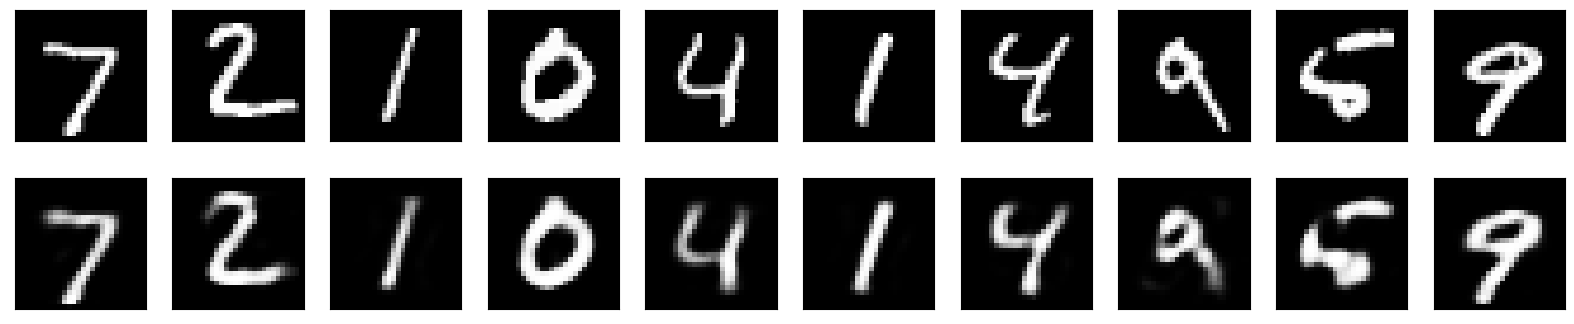

In [20]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()